In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"n1ma01","key":"bad72fc2889ecc556f27ac07ef58a70e"}'}

In [2]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d datasnaek/youtube-new

import zipfile
with zipfile.ZipFile("youtube-new.zip", 'r') as zip_ref:
    zip_ref.extractall("extracted_data")

import os
os.listdir("extracted_data")


Dataset URL: https://www.kaggle.com/datasets/datasnaek/youtube-new
License(s): CC0-1.0


['KRvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FR_category_id.json',
 'US_category_id.json',
 'RU_category_id.json',
 'GBvideos.csv',
 'INvideos.csv',
 'DE_category_id.json',
 'CA_category_id.json',
 'MXvideos.csv',
 'JP_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'GB_category_id.json',
 'FRvideos.csv',
 'IN_category_id.json',
 'KR_category_id.json',
 'CAvideos.csv',
 'USvideos.csv']

In [3]:
import pandas as pd
import os

csv_files = [f for f in os.listdir("extracted_data") if f.endswith('.csv')]

df_list = []
for file in csv_files:
    path = os.path.join("extracted_data", file)
    try:
        df = pd.read_csv(path, encoding='utf-8-sig')
        df['source_file'] = file
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

merged_df = pd.concat(df_list, ignore_index=True)
print(f"Final shape: {merged_df.shape}")
merged_df.head()

Error reading KRvideos.csv: 'utf-8' codec can't decode bytes in position 261291-261292: invalid continuation byte
Error reading RUvideos.csv: 'utf-8' codec can't decode byte 0xd0 in position 364767: invalid continuation byte
Error reading MXvideos.csv: 'utf-8' codec can't decode byte 0xc3 in position 130670: invalid continuation byte
Error reading JPvideos.csv: 'utf-8' codec can't decode bytes in position 215323-215324: invalid continuation byte
Final shape: (239662, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,source_file
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GBvideos.csv
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GBvideos.csv
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GBvideos.csv
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GBvideos.csv
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GBvideos.csv


In [4]:
merged_df[['title', 'description', 'source_file']].sample(5)

,title,description,source_file
197399,MY APARTMENT TOUR!!,HI SISTERS! It's FINALLY here... the video you...,CAvideos.csv
121934,AIR IMMIGRATION (feat. Pierre Grenier),Toutes nos vidéos à ne pas rater sur notre cha...,FRvideos.csv
143932,Maitre Gims je suis musulman je peux pas aider...,"La Spiritualité pour le Jeunes, Livre par Mast...",FRvideos.csv
226829,Why This Wagyu Sandwich Is Worth $85,SakaMai has brought Japan's most famous sandwi...,USvideos.csv
184968,House Party: Booze Quest - PART 4 - Game Grumps,What's a party without some booze?\nClick to S...,CAvideos.csv


In [5]:
merged_df['source_file'].unique()

array(['GBvideos.csv', 'INvideos.csv', 'DEvideos.csv', 'FRvideos.csv',
       'CAvideos.csv', 'USvideos.csv'], dtype=object)

# 2.1 YouTube Videos Analysis

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = merged_df.copy(deep=True)

In [8]:
df.shape

(239662, 17)

In [9]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,source_file
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,GBvideos.csv
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,GBvideos.csv
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,GBvideos.csv
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,GBvideos.csv
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GBvideos.csv


In [10]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

,trending_date
0,2017-11-14
1,2017-11-14
2,2017-11-14
3,2017-11-14
4,2017-11-14


In [11]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

,publish_time
0,2017-11-10 07:38:29
1,2017-11-12 06:24:44
2,2017-11-10 17:00:03
3,2017-11-13 02:30:38
4,2017-11-13 01:45:13


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239662 entries, 0 to 239661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                239662 non-null  object        
 1   trending_date           239662 non-null  datetime64[ns]
 2   title                   239662 non-null  object        
 3   channel_title           239662 non-null  object        
 4   category_id             239662 non-null  int64         
 5   publish_time            239662 non-null  datetime64[ns]
 6   tags                    239662 non-null  object        
 7   views                   239662 non-null  int64         
 8   likes                   239662 non-null  int64         
 9   dislikes                239662 non-null  int64         
 10  comment_count           239662 non-null  int64         
 11  thumbnail_link          239662 non-null  object        
 12  comments_disabled       239662

In [13]:
df.describe()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count
count,239662,239662.000000,239662,2.396620e+05,2.396620e+05,2.396620e+05,2.396620e+05
mean,2018-02-26 09:09:47.537448960,20.002950,2018-02-16 09:41:36.906104832,1.898465e+06,5.218776e+04,2.849046e+03,5.632043e+03
min,2017-11-14 00:00:00,1.000000,2006-07-23 08:24:11,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-01-03 00:00:00,17.000000,2017-12-30 11:00:03,8.385125e+04,1.277000e+03,7.300000e+01,1.760000e+02
50%,2018-02-25 00:00:00,24.000000,2018-02-20 21:31:45,3.082685e+05,6.522000e+03,2.960000e+02,7.910000e+02
75%,2018-04-23 00:00:00,24.000000,2018-04-18 18:55:04,1.041631e+06,2.895575e+04,1.126000e+03,3.043000e+03
max,2018-06-14 00:00:00,44.000000,2018-06-14 02:25:38,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06
std,NaN,7.271423,NaN,8.746280e+06,1.950500e+05,2.703692e+04,2.951592e+04


In [14]:
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


Let’s map the category name for each category ID.


In [15]:
import json

category_mappings = {}

for file in os.listdir("extracted_data"):
    if file.endswith("_category_id.json"):
        country_code = file[:2]
        with open(os.path.join("extracted_data", file)) as f:
            data = json.load(f)
            mapping = {
                int(item["id"]): item["snippet"]["title"]
                for item in data["items"]
            }
            category_mappings[country_code] = mapping


In [16]:
def get_category_name(row):
    try:
        country = row['source_file'][:2].upper()
        category_id = int(row['category_id'])
        return category_mappings.get(country, {}).get(category_id, "Unknown")
    except:
        return "Unknown"


In [17]:
df['category_name'] = df.apply(get_category_name, axis=1)

In [18]:
df['category_name'].unique()

array(['Howto & Style', 'Entertainment', 'Music', 'Sports',
       'News & Politics', 'People & Blogs', 'Comedy',
       'Science & Technology', 'Pets & Animals', 'Education',
       'Film & Animation', 'Gaming', 'Autos & Vehicles',
       'Travel & Events', 'Unknown', 'Shows', 'Movies', 'Trailers',
       'Nonprofits & Activism'], dtype=object)

In [19]:
df[['category_name', 'category_id']].sample(10)

,category_name,category_id
179469,Entertainment,24
148883,News & Politics,25
169623,Science & Technology,28
181903,Entertainment,24
169410,Music,10
38273,Entertainment,24
145484,Comedy,23
89441,Comedy,23
172495,Music,10
223611,Music,10


## Required Questions to Answer

#### 1. How are engagement metrics (views, likes and dislikes) distributed overall and across different video categories?

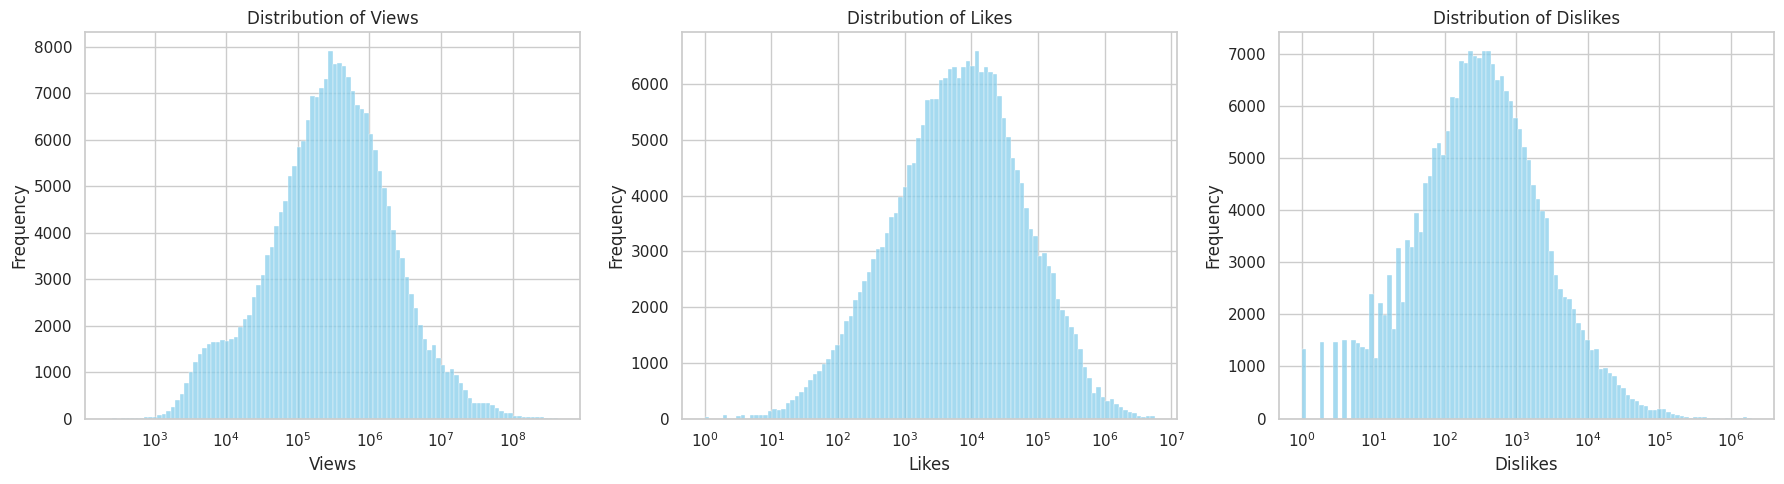

In [20]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['views', 'likes', 'dislikes']
titles = ['Views', 'Likes', 'Dislikes']

for i, metric in enumerate(metrics):
    sns.histplot(df[metric], bins=100, ax=axes[i], log_scale=True, color='skyblue')
    axes[i].set_title(f"Distribution of {titles[i]}")
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-21-63c10d9d3390>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_by_category, x='category_name', y=metric, ax=axes[i], palette='Blues_r')
<ipython-input-21-63c10d9d3390>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_by_category, x='category_name', y=metric, ax=axes[i], palette='Blues_r')
<ipython-input-21-63c10d9d3390>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_by_category, x='category_name', y=metric, ax=axes[i], palette='Blues_r')


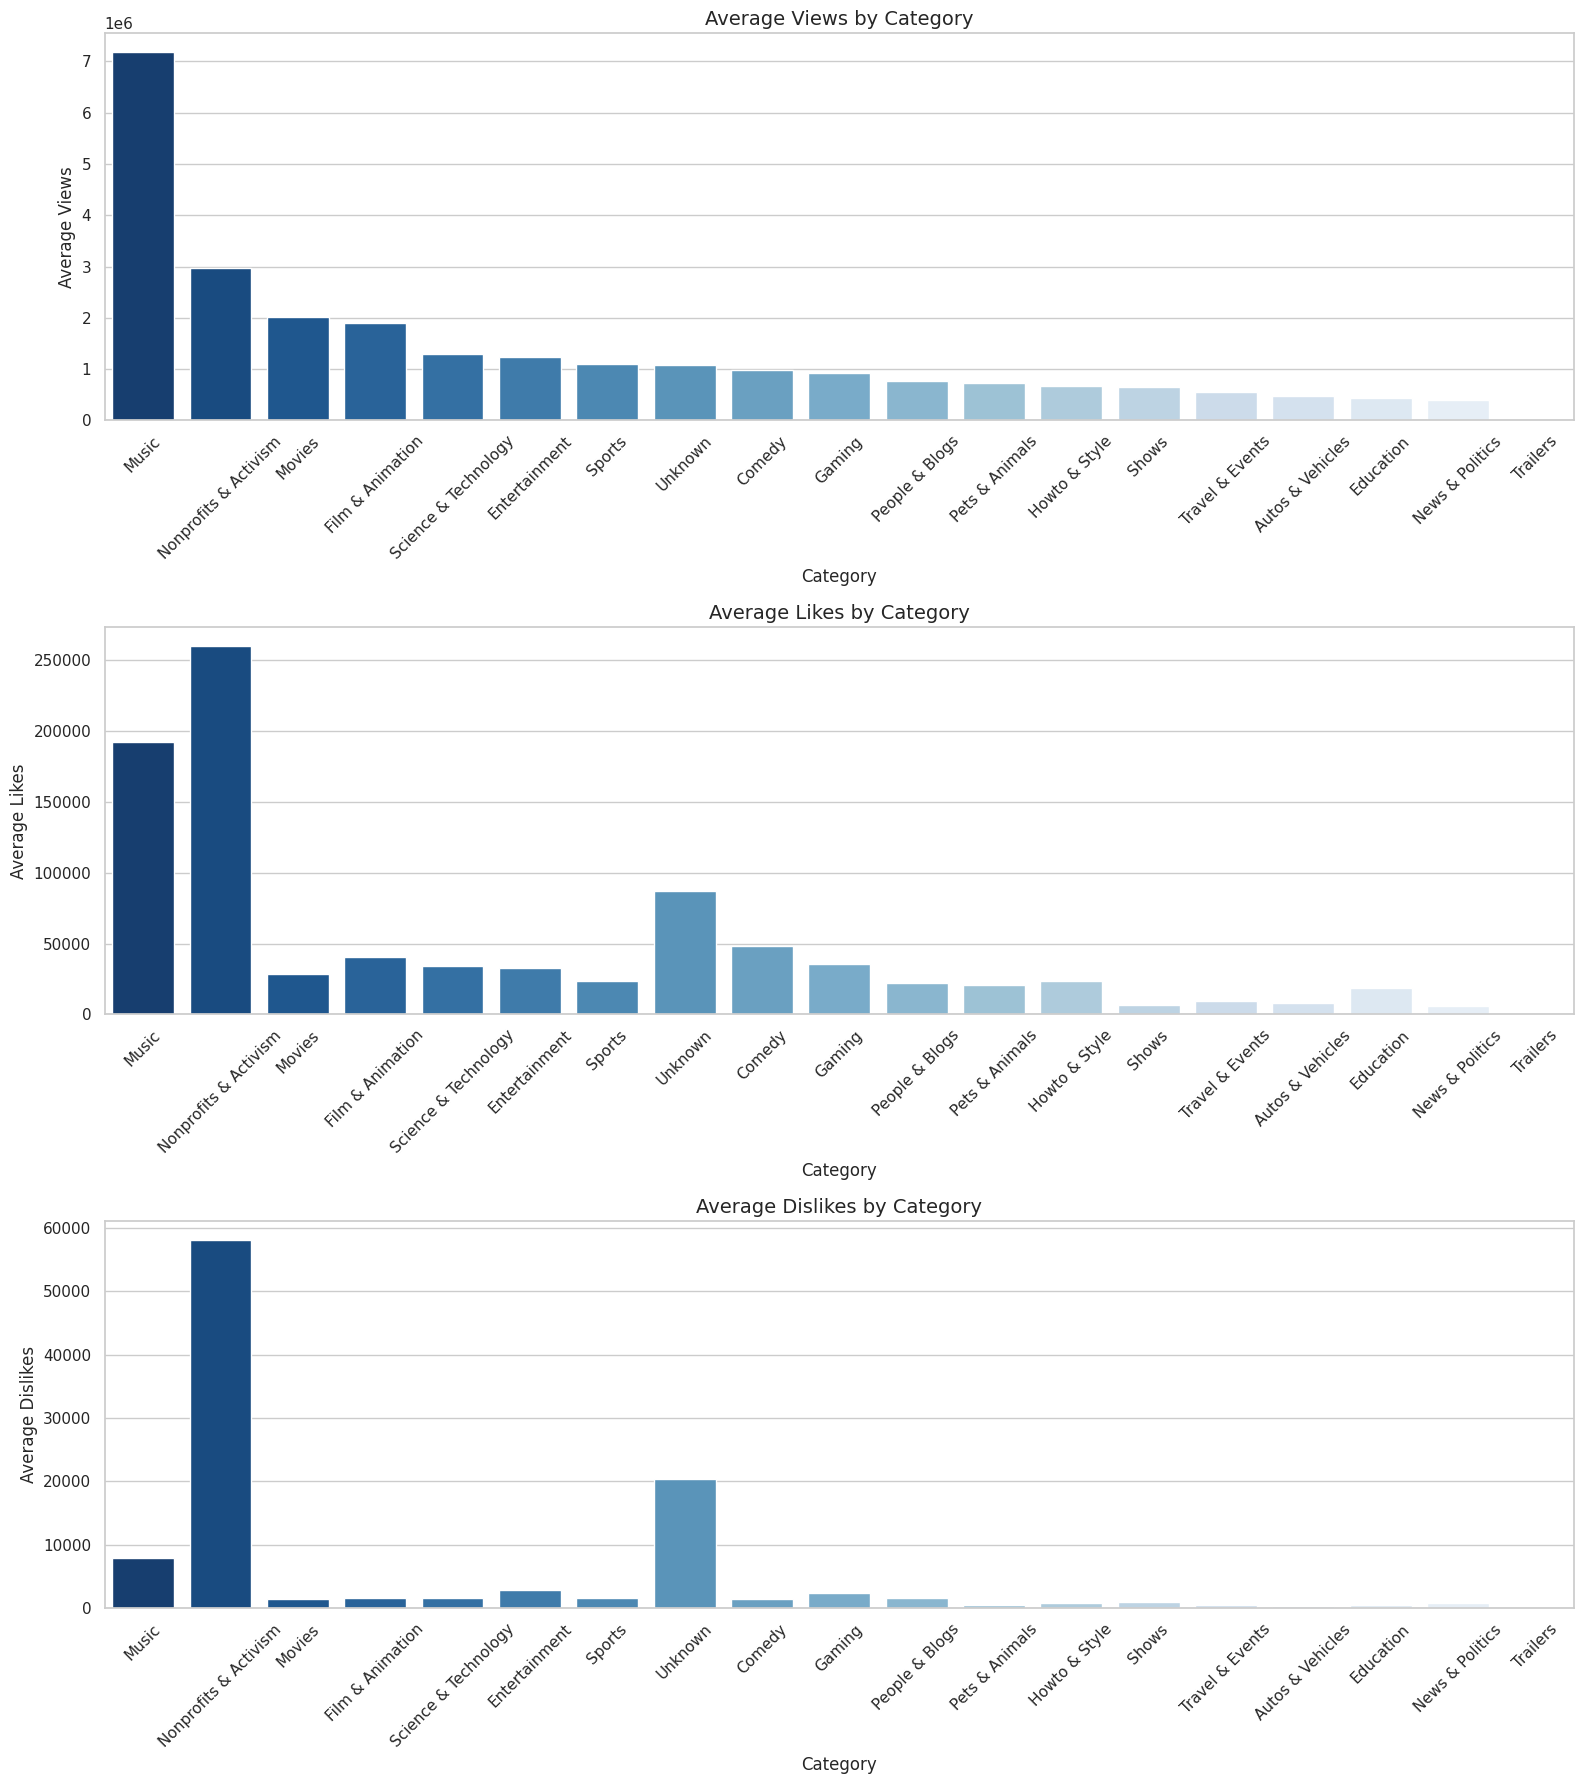

In [21]:
engagement_by_category = df.groupby('category_name')[['views', 'likes', 'dislikes']].mean().reset_index()

engagement_by_category = engagement_by_category.sort_values('views', ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(16, 18))

metrics = ['views', 'likes', 'dislikes']
titles = ['Average Views by Category', 'Average Likes by Category', 'Average Dislikes by Category']

for i, metric in enumerate(metrics):
    sns.barplot(data=engagement_by_category, x='category_name', y=metric, ax=axes[i], palette='Blues_r')
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(f'Average {metric.capitalize()}')

plt.tight_layout()
plt.show()


#### 2. Which YouTube channels and video categories trend the most in each country and globally?

In [22]:
top_channels_global = (
    df['channel_title']
    .value_counts()
    .head(10)
    .reset_index()
)
top_channels_global.columns = ['channel_title', 'video_count']


top_categories_global = (
    df['category_name']
    .value_counts()
    .head(10)
    .reset_index()
)
top_categories_global.columns = ['category_name', 'video_count']

<ipython-input-23-93aa2ca7dc38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_channels_global, y='channel_title', x='video_count', palette='viridis')


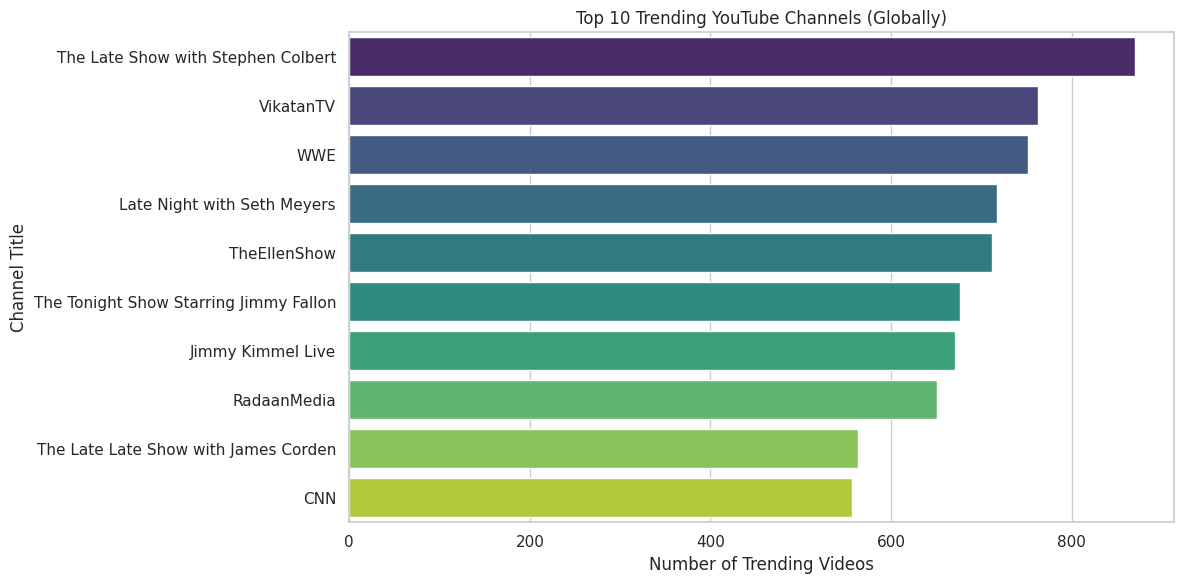

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_channels_global, y='channel_title', x='video_count', palette='viridis')
plt.title('Top 10 Trending YouTube Channels (Globally)')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Channel Title')
plt.tight_layout()
plt.show()

<ipython-input-24-87a3b5f6f88e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories_global, y='category_name', x='video_count', palette='viridis')


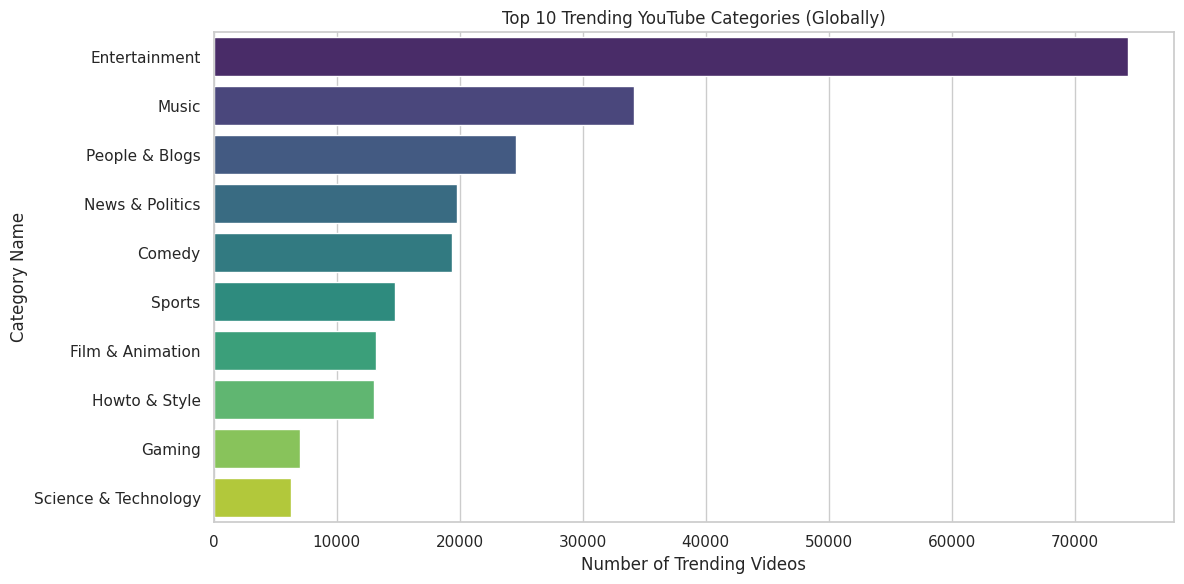

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categories_global, y='category_name', x='video_count', palette='viridis')
plt.title('Top 10 Trending YouTube Categories (Globally)')
plt.xlabel('Number of Trending Videos')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()

In [25]:
df['country'] = df['source_file'].str[:2].str.upper()

top_channels_by_country = (
    df.groupby(['country', 'channel_title'])
    .size()
    .reset_index(name='video_count')
    .sort_values(['country', 'video_count'], ascending=[True, False])
    .groupby('country')
    .head(1)
)

top_channels_by_country

,country,channel_title,video_count
3276,CA,SET India,192
6868,DE,Galileo,200
16618,FR,Troom Troom FR,195
19124,GB,The Tonight Show Starring Jimmy Fallon,208
20741,IN,VikatanTV,284
21447,US,ESPN,203


In [26]:
top_categories_by_country = (
    df.groupby(['country', 'category_name'])
    .size()
    .reset_index(name='video_count')
    .sort_values(['country', 'video_count'], ascending=[True, False])
    .groupby('country')
    .head(1)
)

top_categories_by_country

,country,category_name,video_count
3,CA,Entertainment,13451
20,DE,Entertainment,15292
38,FR,Entertainment,9819
60,GB,Music,13754
72,IN,Entertainment,16712
89,US,Entertainment,9964


#### 3. Are there seasonal or day-of-week patterns in trending videos? How does the upload day and time impact video engagement?

In [27]:
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

In [28]:
df['trending_day'] = df['trending_date'].dt.day_name()
df['trending_month'] = df['trending_date'].dt.month_name()

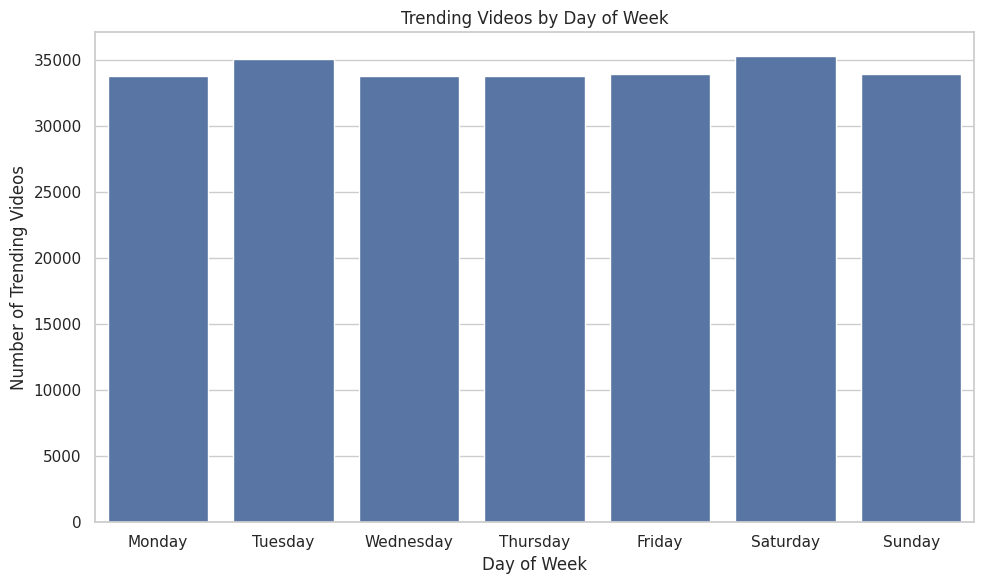

In [29]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='trending_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.title("Trending Videos by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trending Videos")
plt.tight_layout()
plt.show()

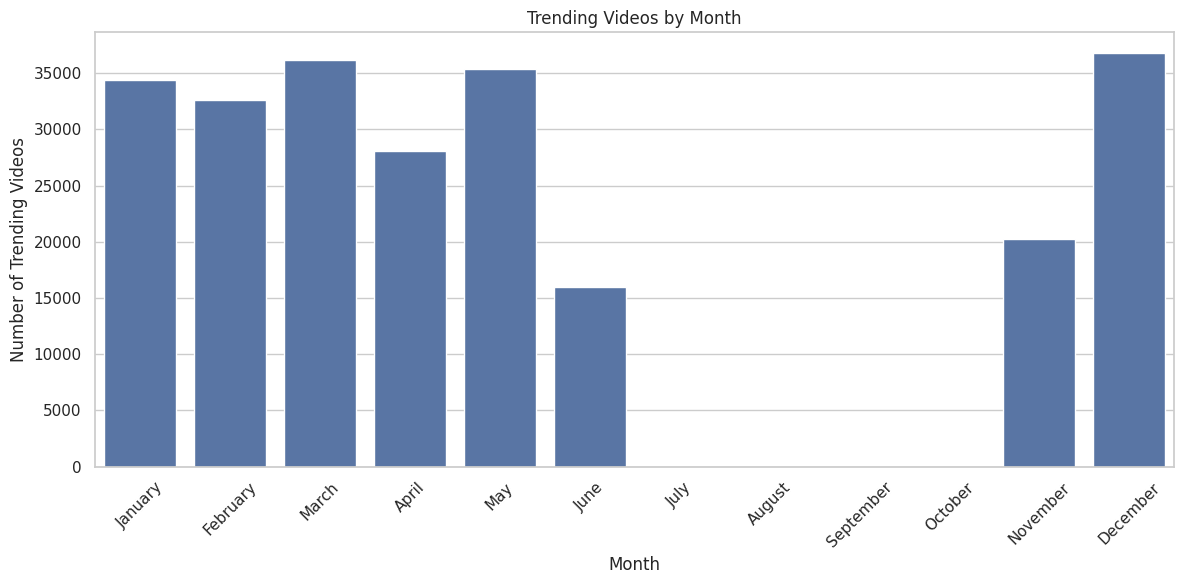

In [30]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='trending_month', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.title("Trending Videos by Month")
plt.xlabel("Month")
plt.ylabel("Number of Trending Videos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [32]:
df['upload_day'] = df['publish_time'].dt.day_name()
df['upload_hour'] = df['publish_time'].dt.hour

<Figure size 1200x600 with 0 Axes>

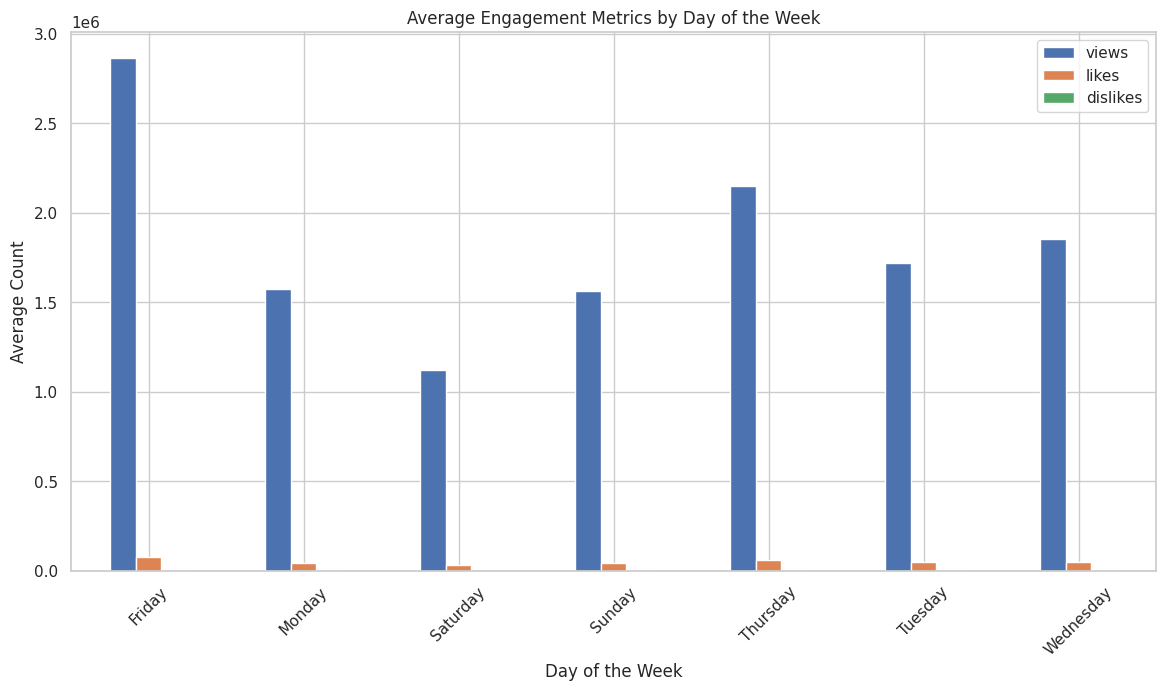

In [33]:
views_by_day = df.groupby('upload_day')[['views', 'likes', 'dislikes']].mean()

plt.figure(figsize=(12, 6))
views_by_day.plot(kind='bar', figsize=(14, 7))
plt.title('Average Engagement Metrics by Day of the Week')
plt.ylabel('Average Count')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

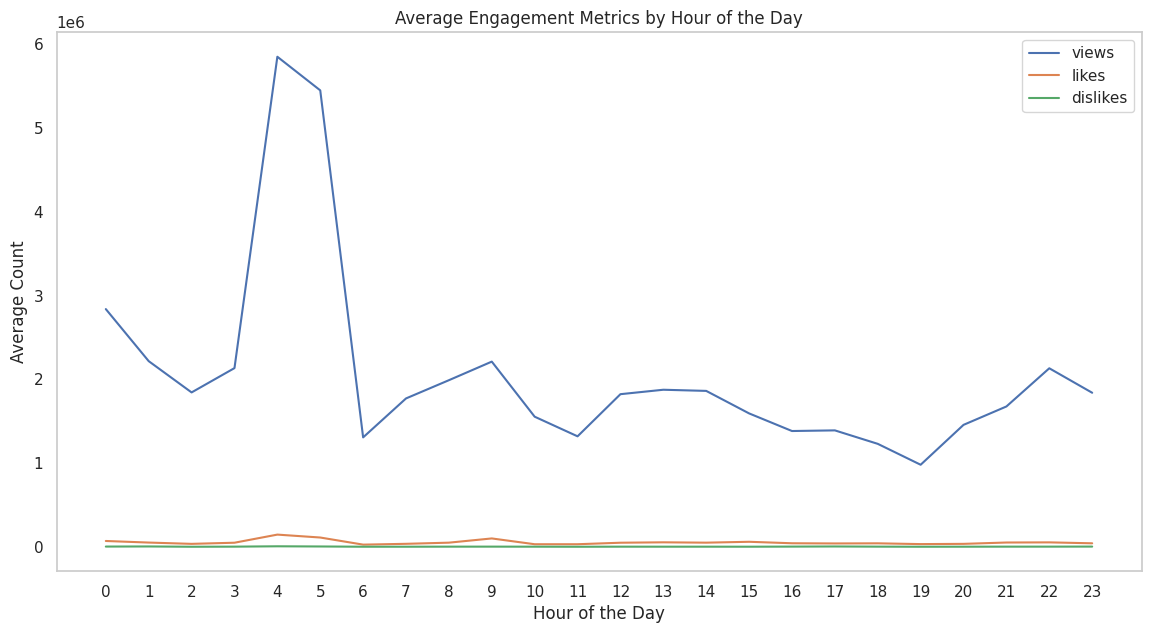

In [34]:
views_by_hour = df.groupby('upload_hour')[['views', 'likes', 'dislikes']].mean()

plt.figure(figsize=(12, 6))
views_by_hour.plot(kind='line', figsize=(14, 7))
plt.title('Average Engagement Metrics by Hour of the Day')
plt.ylabel('Average Count')
plt.xlabel('Hour of the Day')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#### 4. Do controversial videos, defined by a high dislike ratio, receive more engagement than universally liked ones?

In [35]:
df['dislike_ratio'] = df['dislikes'] / (df['likes'] + df['dislikes'])

In [36]:
threshold = 0.5

df['video_type'] = df['dislike_ratio'].apply(
    lambda x: 'Controversial' if x >= threshold else 'Liked'
)

<ipython-input-37-3a53c4c685bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='video_type', y=metric, ax=axes[i], palette='coolwarm')
<ipython-input-37-3a53c4c685bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='video_type', y=metric, ax=axes[i], palette='coolwarm')
<ipython-input-37-3a53c4c685bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='video_type', y=metric, ax=axes[i], palette='coolwarm')


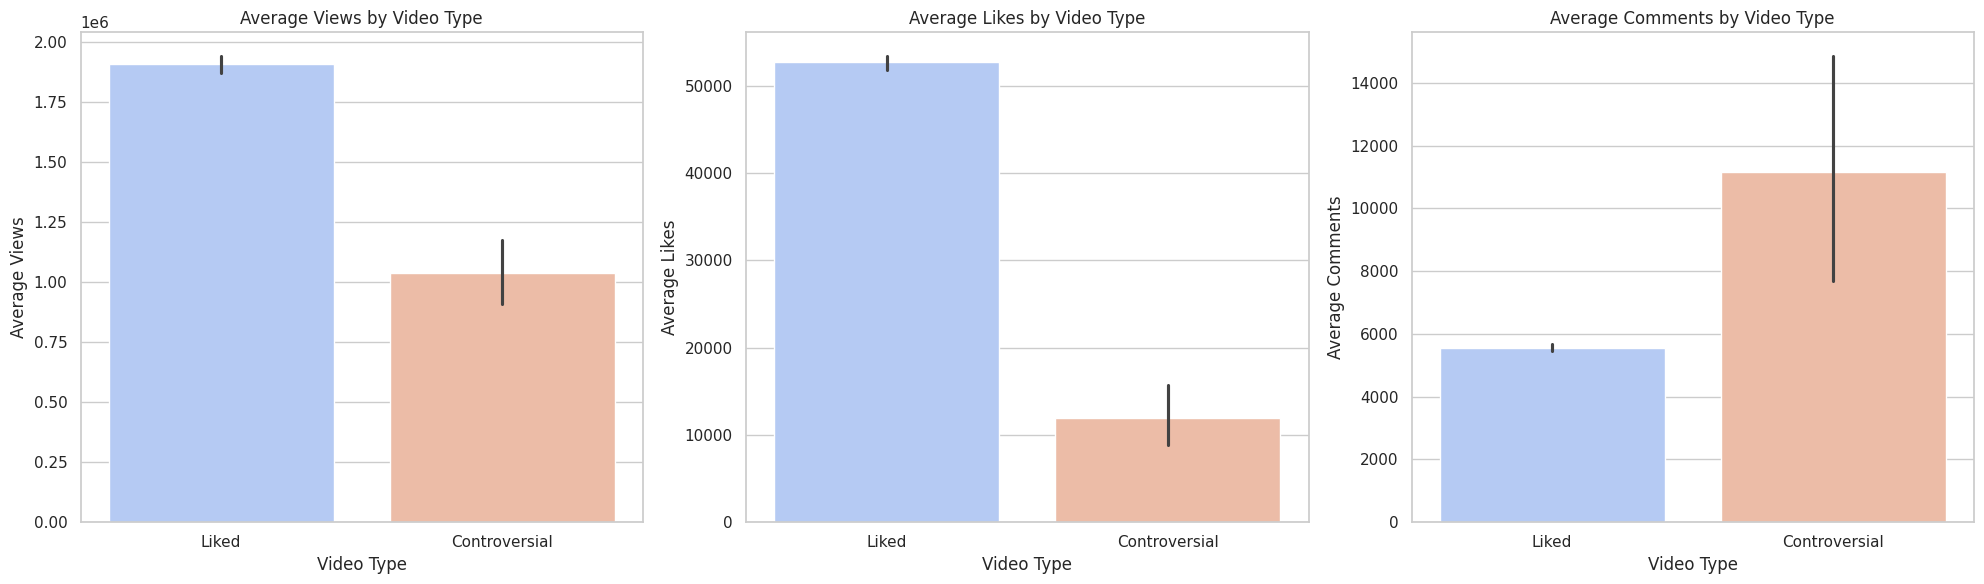

In [37]:
engagement_metrics = ['views', 'likes', 'comment_count']
titles = ['Average Views', 'Average Likes', 'Average Comments']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, metric in enumerate(engagement_metrics):
    sns.barplot(data=df, x='video_type', y=metric, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f"{titles[i]} by Video Type")
    axes[i].set_ylabel(titles[i])
    axes[i].set_xlabel("Video Type")

plt.tight_layout()
plt.show()

#### 5. How do video tags influence engagement, and which tags are most commonly used in trending videos?

In [38]:
df['tags'] = df['tags'].replace('[none]', '').fillna('')

tags_exploded = df.assign(tag=df['tags'].str.split('|')).explode('tag')
tags_exploded['tag'] = tags_exploded['tag'].str.strip().str.lower()

<ipython-input-39-2461fb549bce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tags, y='tag', x='count', palette='magma')


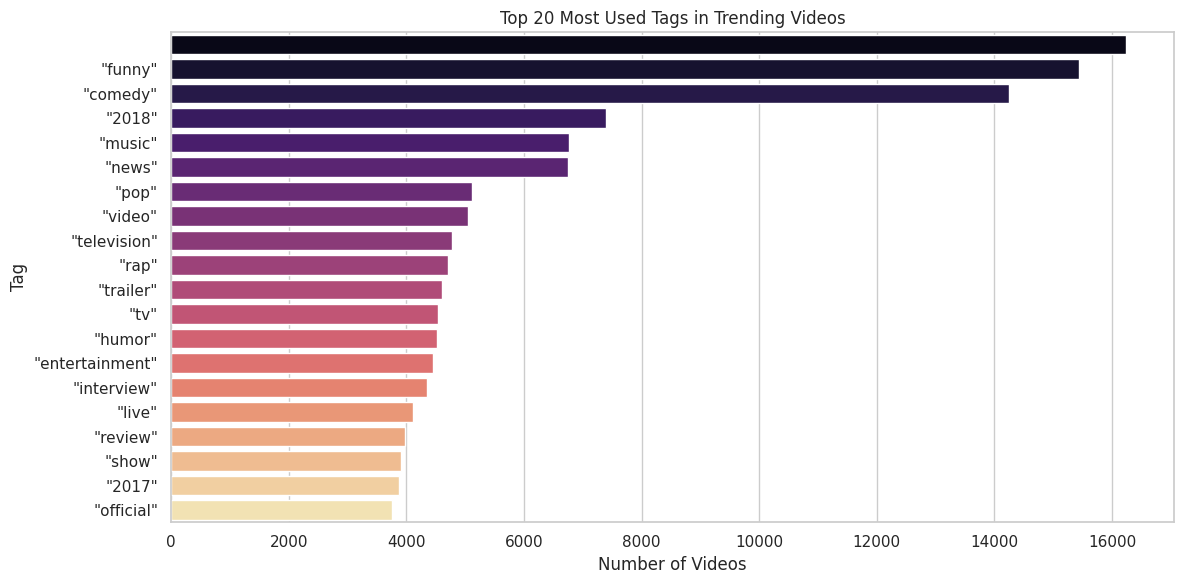

In [39]:
tag_counts = tags_exploded['tag'].value_counts().head(20)
top_tags = pd.DataFrame({'tag': tag_counts.index, 'count': tag_counts.values})

plt.figure(figsize=(12, 6))
sns.barplot(data=top_tags, y='tag', x='count', palette='magma')
plt.title('Top 20 Most Used Tags in Trending Videos')
plt.xlabel('Number of Videos')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()

In [40]:
tag_engagement = (
    tags_exploded
    .groupby('tag')[['views', 'likes', 'comment_count']]
    .mean()
    .sort_values(by='views', ascending=False)
    .head(20)
    .reset_index()
)

<ipython-input-41-a3e4afe6a1f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_engagement, y='tag', x='views', palette='crest')


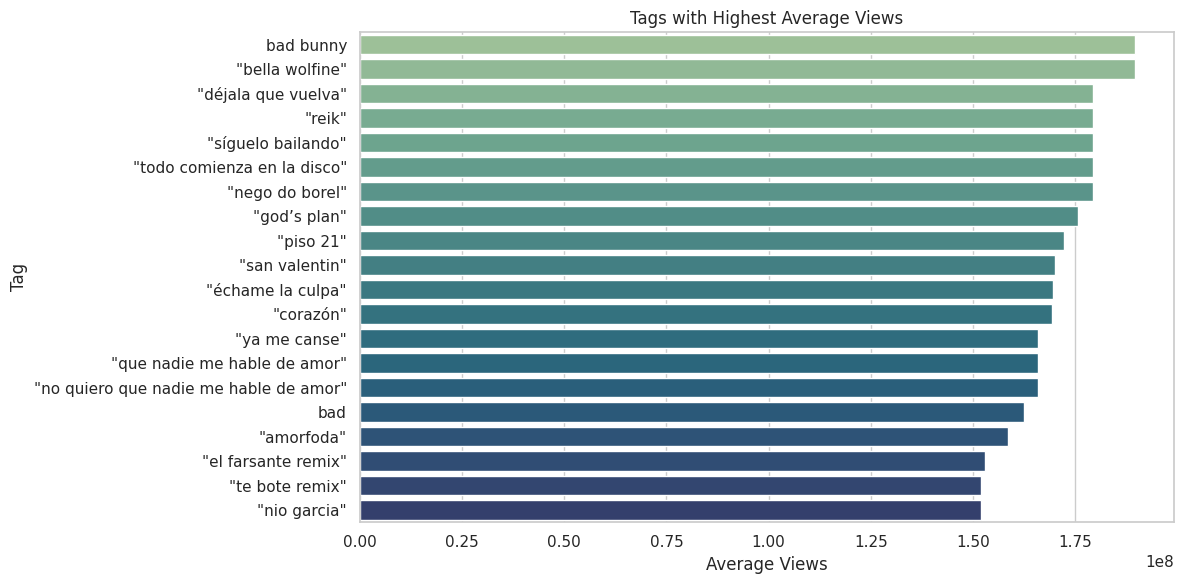

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_engagement, y='tag', x='views', palette='crest')
plt.title('Tags with Highest Average Views')
plt.xlabel('Average Views')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()

<ipython-input-42-1a8e87f6f7c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_engagement, y='tag', x='likes', palette='crest')


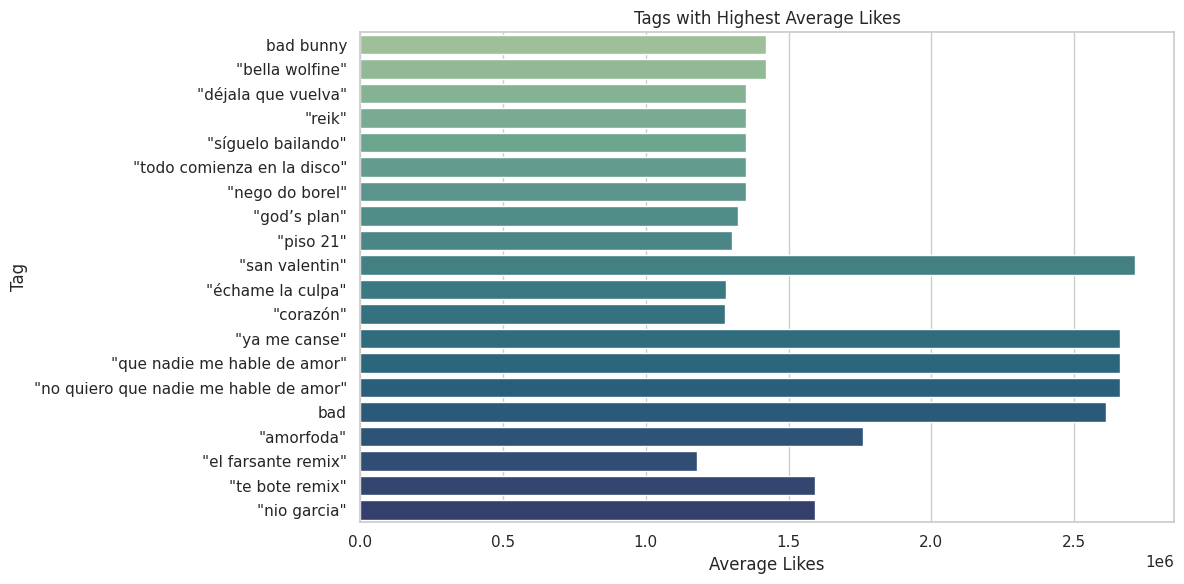

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_engagement, y='tag', x='likes', palette='crest')
plt.title('Tags with Highest Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()

#### 6. How does the length of a video title impact engagement levels?

In [43]:
df['title_length'] = df['title'].apply(len)

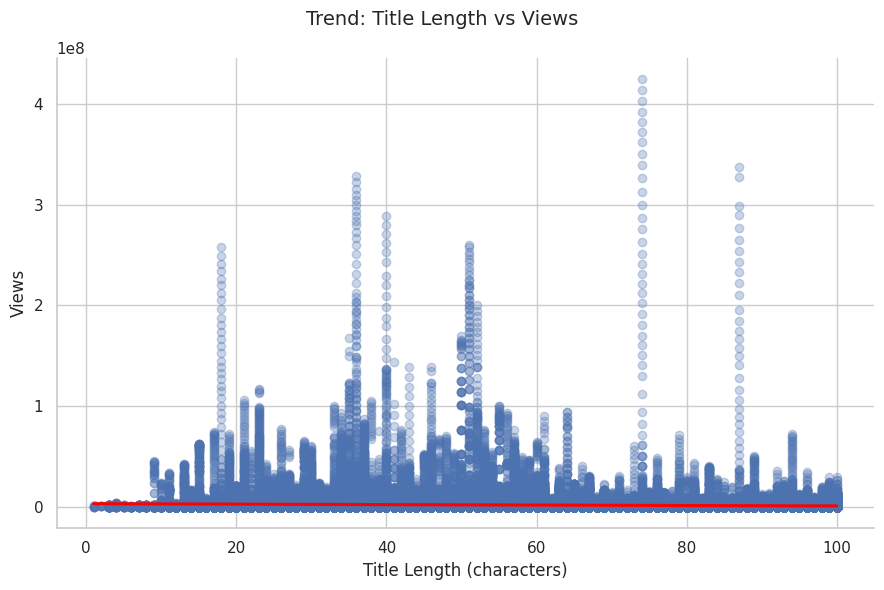

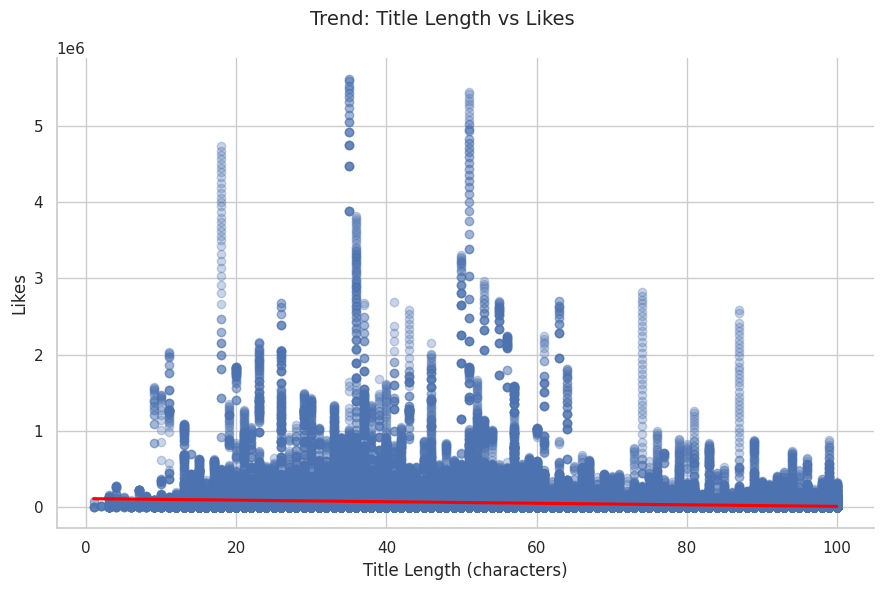

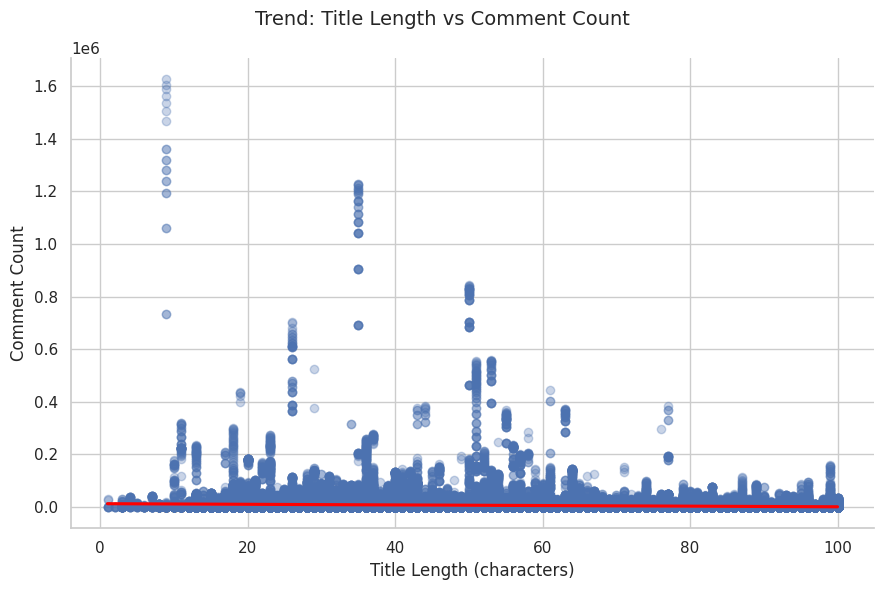

In [44]:
engagement_metrics = ['views', 'likes', 'comment_count']

for metric in engagement_metrics:
    plot = sns.lmplot(
        data=df,
        x='title_length',
        y=metric,
        height=6,
        aspect=1.5,
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    plot.set_axis_labels('Title Length (characters)', metric.replace('_', ' ').title())
    plot.fig.suptitle(f'Trend: Title Length vs {metric.replace("_", " ").title()}', fontsize=14)
    plot.tight_layout()
    plot.fig.subplots_adjust(top=0.9)
    plt.show()

#### 7. Is there a relationship between video title sentiment, whether positive, neutral, or negative, and engagement levels? (extra point)

In [45]:
!pip install -q vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [47]:
def get_sentiment_label(text):
  score = analyzer.polarity_scores(str(text))['compound']
  if score >= 0.05:
      return 'Positive'
  elif score <= -0.05:
      return 'Negative'
  else:
      return 'Neutral'

df['title_sentiment'] = df['title'].apply(get_sentiment_label)

In [48]:
engagement_by_sentiment = df.groupby('title_sentiment')[['views', 'likes', 'dislikes', 'comment_count']].mean().reset_index()

melted = engagement_by_sentiment.melt(id_vars='title_sentiment',
                                       value_vars=['views', 'likes', 'dislikes', 'comment_count'],
                                       var_name='metric',
                                       value_name='average')

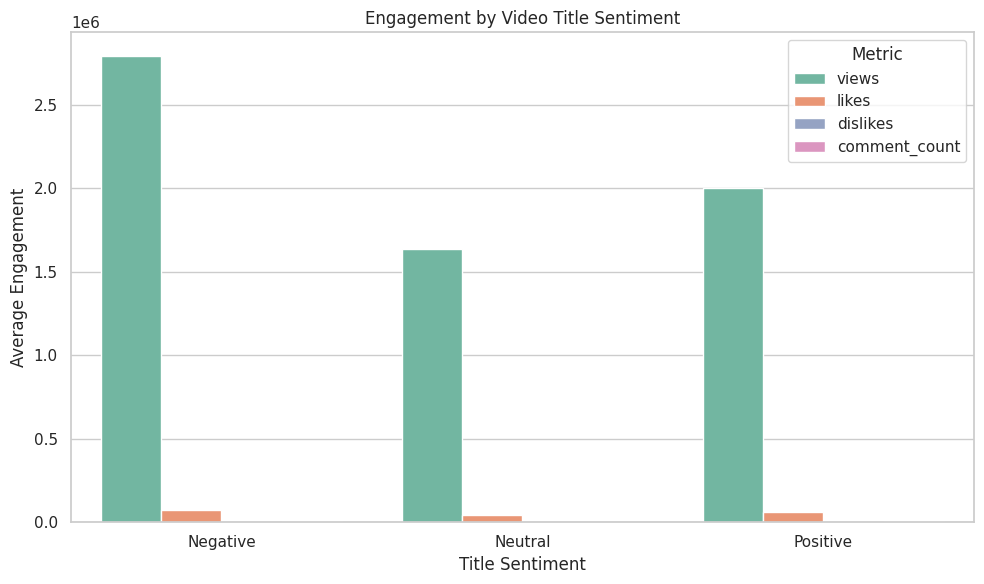

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='title_sentiment', y='average', hue='metric', palette='Set2')

plt.title('Engagement by Video Title Sentiment')
plt.xlabel('Title Sentiment')
plt.ylabel('Average Engagement')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

#### 8. Do clickbait-style titles, such as those containing words like ”shocking” or ”must watch,” result in higher engagement? (extra point)

In [50]:
clickbait_keywords = [
    'shocking', 'must watch', 'unbelievable', 'you won\'t believe', 'insane',
    'top', 'epic', 'secret', 'what happened next', 'gone wrong', 'crazy',
    'biggest', 'revealed', 'never seen before', 'mind blowing'
]

In [51]:
import re

pattern = '|'.join([re.escape(word) for word in clickbait_keywords])

def is_clickbait(title):
    return bool(re.search(pattern, str(title).lower()))

df['is_clickbait'] = df['title'].apply(is_clickbait)
df['clickbait_label'] = df['is_clickbait'].map({True: 'Clickbait', False: 'Not Clickbait'})

In [52]:
engagement_clickbait = df.groupby('clickbait_label')[['views', 'likes', 'comment_count']].mean().reset_index()

In [53]:
melted_cb = engagement_clickbait.melt(id_vars='clickbait_label',
                                      value_vars=['views', 'likes', 'comment_count'],
                                      var_name='metric',
                                      value_name='average')


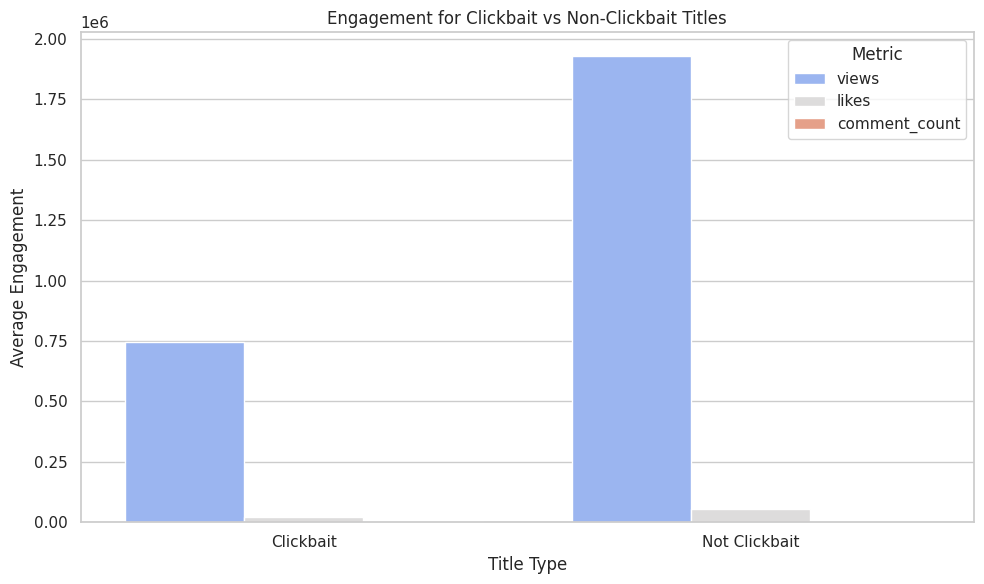

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_cb, x='clickbait_label', y='average', hue='metric', palette='coolwarm')

plt.title('Engagement for Clickbait vs Non-Clickbait Titles')
plt.xlabel('Title Type')
plt.ylabel('Average Engagement')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Story line: Let’s see what factors make a video become trending!

#### 1. How do thumbnail-related cues (like title emojis or ALL CAPS) influence engagement?

In [60]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.2 MB/s eta 0:00:00


In [61]:
import emoji
import re

def contains_emoji(text):
  return any(char in emoji.EMOJI_DATA for char in str(text))

def contains_all_caps(text):
    words = str(text).split()
    return any(word.isupper() and len(word) > 2 for word in words)

def count_exclamations(text):
    return str(text).count('!')

df['has_emoji'] = df['title'].apply(contains_emoji)
df['has_all_caps'] = df['title'].apply(contains_all_caps)
df['num_exclamations'] = df['title'].apply(count_exclamations)

In [62]:
metrics = ['views', 'likes', 'dislikes', 'comment_count']

emoji_df = df.groupby('has_emoji')[metrics].mean().reset_index()
caps_df = df.groupby('has_all_caps')[metrics].mean().reset_index()

df['exclam_bin'] = pd.cut(df['num_exclamations'], bins=[-1,0,1,3,100], labels=['None','1','2-3','4+'])
exclam_df = df.groupby('exclam_bin')[metrics].mean().reset_index()

<ipython-input-62-f066dbe21648>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exclam_df = df.groupby('exclam_bin')[metrics].mean().reset_index()


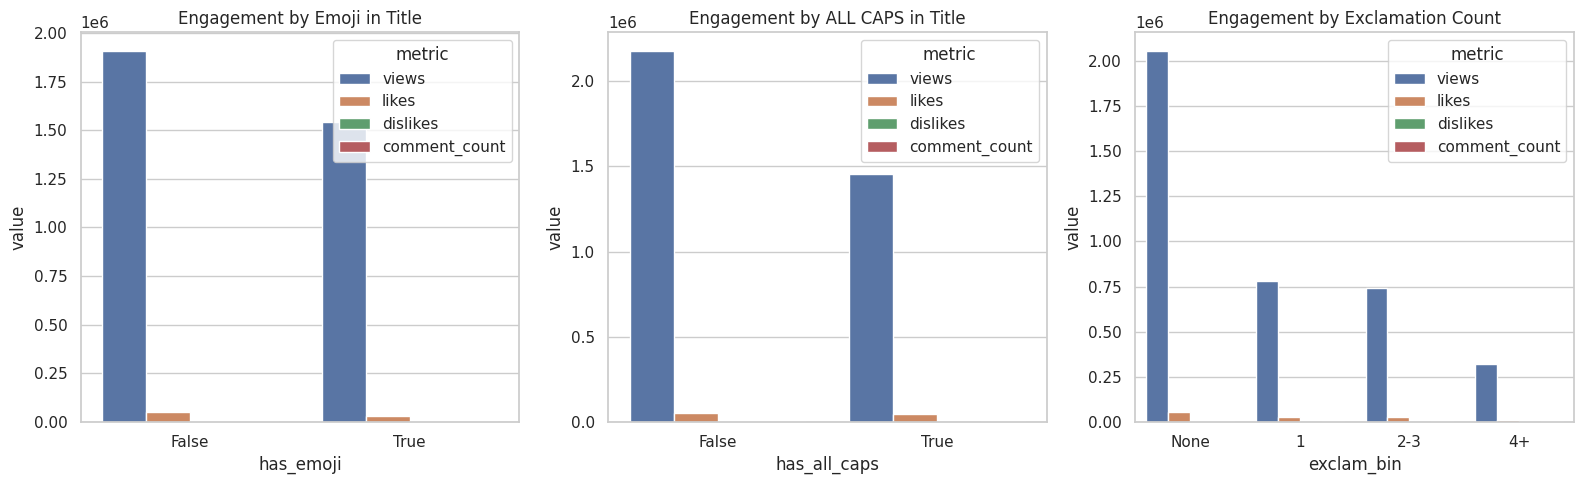

In [64]:
plt.figure(figsize=(16, 5))


plt.subplot(1, 3, 1)
sns.barplot(data=emoji_df.melt(id_vars='has_emoji', var_name='metric'), x='has_emoji', y='value', hue='metric')
plt.title('Engagement by Emoji in Title')

plt.subplot(1, 3, 2)
sns.barplot(data=caps_df.melt(id_vars='has_all_caps', var_name='metric'), x='has_all_caps', y='value', hue='metric')
plt.title('Engagement by ALL CAPS in Title')

plt.subplot(1, 3, 3)
sns.barplot(data=exclam_df.melt(id_vars='exclam_bin', var_name='metric'), x='exclam_bin', y='value', hue='metric')
plt.title('Engagement by Exclamation Count')

plt.tight_layout()
plt.show()

#### 2. Do shorter or longer video descriptions correlate with higher engagement?


In [67]:
df['description_length'] = df['description'].astype(str).apply(len)

In [69]:
df['desc_length_bin'] = pd.cut(
    df['description_length'],
    bins=[-1, 50, 200, 500, 1000, float('inf')],
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

In [71]:
metrics = ['views', 'likes', 'dislikes', 'comment_count']
desc_df = df.groupby('desc_length_bin')[metrics].mean().reset_index()

<ipython-input-71-042efc5ffe29>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc_df = df.groupby('desc_length_bin')[metrics].mean().reset_index()


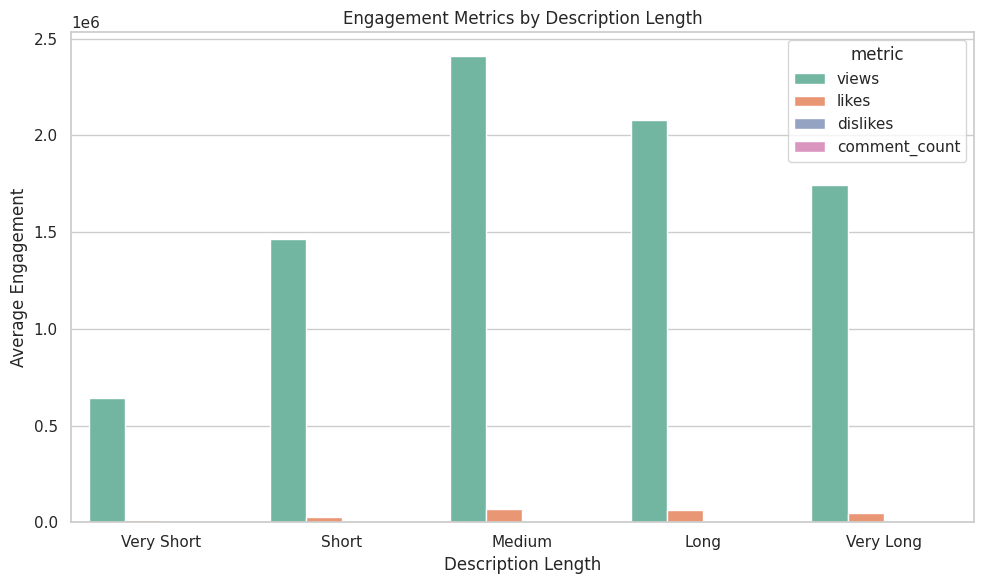

In [74]:
melted = desc_df.melt(id_vars='desc_length_bin', var_name='metric', value_name='value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='desc_length_bin', y='value', hue='metric', palette='Set2')

plt.title('Engagement Metrics by Description Length')
plt.xlabel('Description Length')
plt.ylabel('Average Engagement')
plt.tight_layout()
plt.show()

#### 3. Which categories tend to trend for longer periods once they appear?

In [79]:
video_trending_days = df.groupby('video_id')['trending_date'].nunique().reset_index()
video_trending_days.rename(columns={'trending_date': 'trending_days'}, inplace=True)
df = df.merge(video_trending_days, on='video_id', how='left')

In [81]:
category_trend_duration = df[['video_id', 'category_name', 'trending_days']].drop_duplicates()
category_avg_duration = category_trend_duration.groupby('category_name')['trending_days'].mean().sort_values(ascending=False).reset_index()

<ipython-input-83-056fce02d991>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_avg_duration, x='trending_days', y='category_name', palette='viridis')


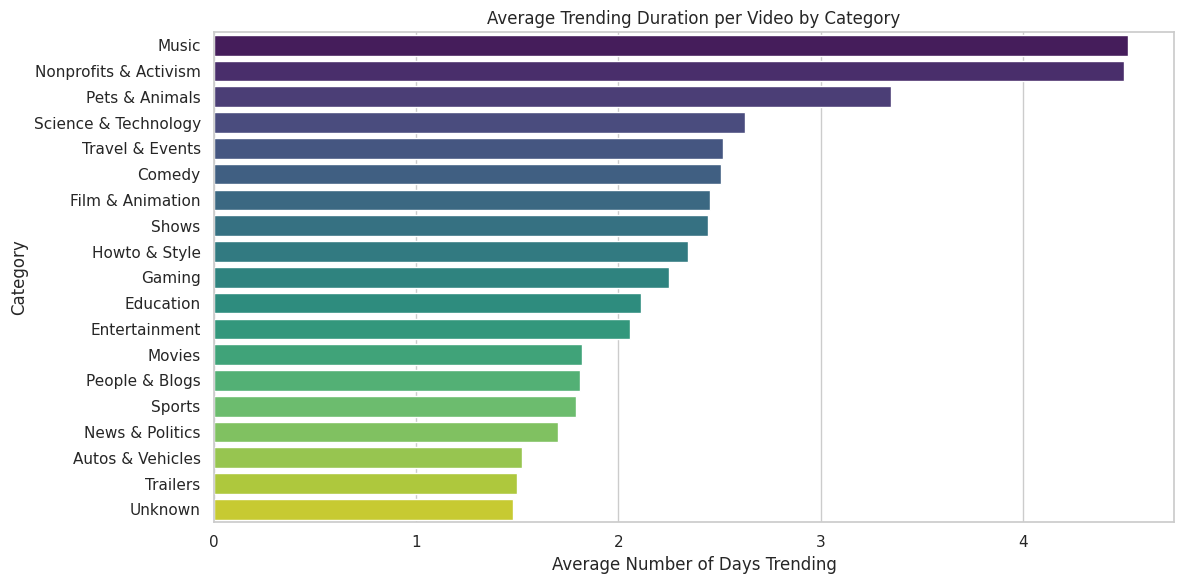

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_avg_duration, x='trending_days', y='category_name', palette='viridis')
plt.title('Average Trending Duration per Video by Category')
plt.xlabel('Average Number of Days Trending')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

#### 4. What is the average lifespan of a trending video, and what impacts it?

In [102]:
print("Average lifespan:", df['trending_days'].mean())
print("Median lifespan:", df['trending_days'].median())
print("Max lifespan:", df['trending_days'].max())

Average lifespan: 7.3564853835818775
Median lifespan: 3.0
Max lifespan: 186


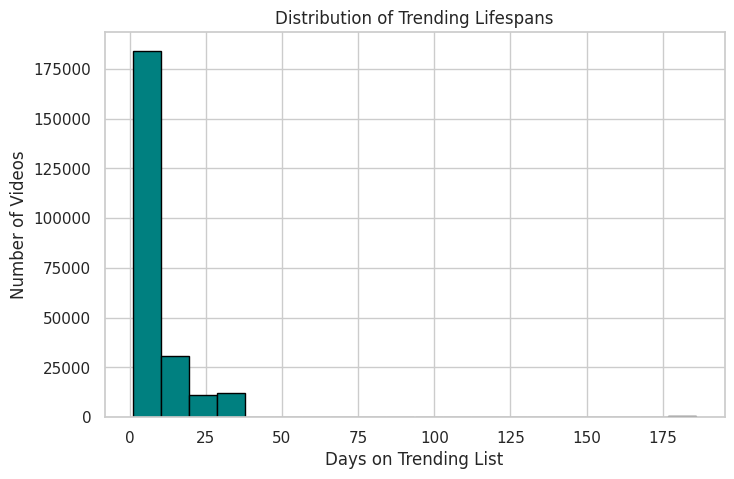

In [103]:
plt.figure(figsize=(8,5))
df['trending_days'].hist(bins=20, color='teal', edgecolor='black')
plt.title("Distribution of Trending Lifespans")
plt.xlabel("Days on Trending List")
plt.ylabel("Number of Videos")
plt.show()

In [104]:
features = ['title_length', 'description_length', 'views', 'likes', 'comment_count', 'trending_days']
print(df[features].corr()['trending_days'].sort_values(ascending=False))

trending_days         1.000000
likes                 0.255924
views                 0.248764
comment_count         0.150521
description_length    0.009224
title_length         -0.098464
Name: trending_days, dtype: float64


#### 5. Do regions have different engagement metrics?

In [141]:
engagement_metrics = ['views', 'likes', 'dislikes', 'comment_count']
country_engagement = df.groupby('country')[engagement_metrics].mean().reset_index()

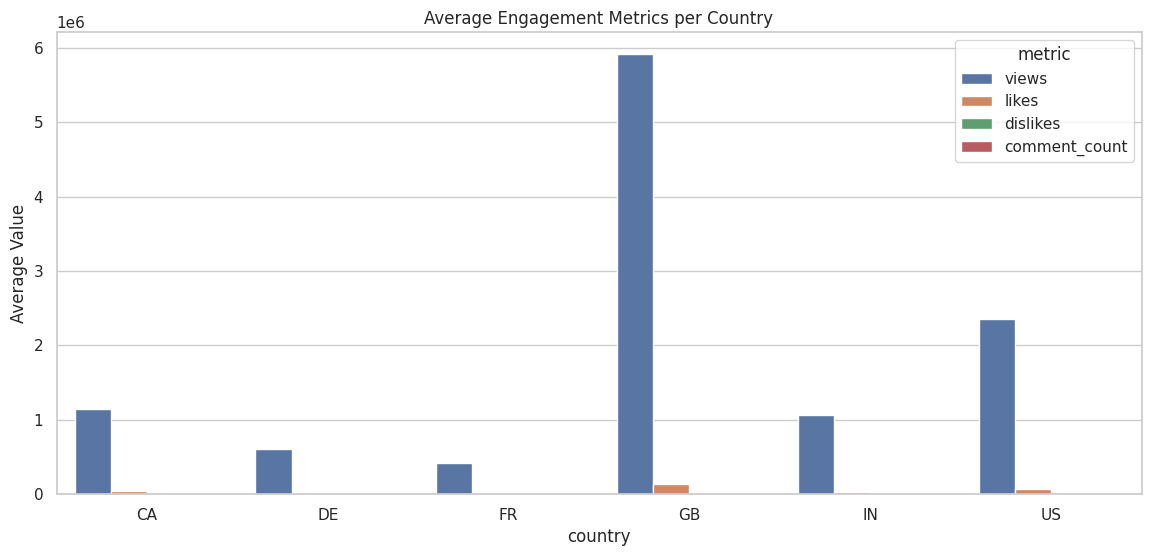

In [142]:
melted = country_engagement.melt(id_vars='country', value_vars=engagement_metrics,
                                  var_name='metric', value_name='average_value')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='country', y='average_value', hue='metric')
plt.title('Average Engagement Metrics per Country')
plt.ylabel('Average Value')
plt.show()

#### 6. Do engagement patterns by upload time differ across countries?

In [111]:
day_country = df.groupby(['country', 'upload_day'])[['views', 'likes', 'comment_count']].mean().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_country['upload_day'] = pd.Categorical(day_country['upload_day'], categories=day_order, ordered=True)

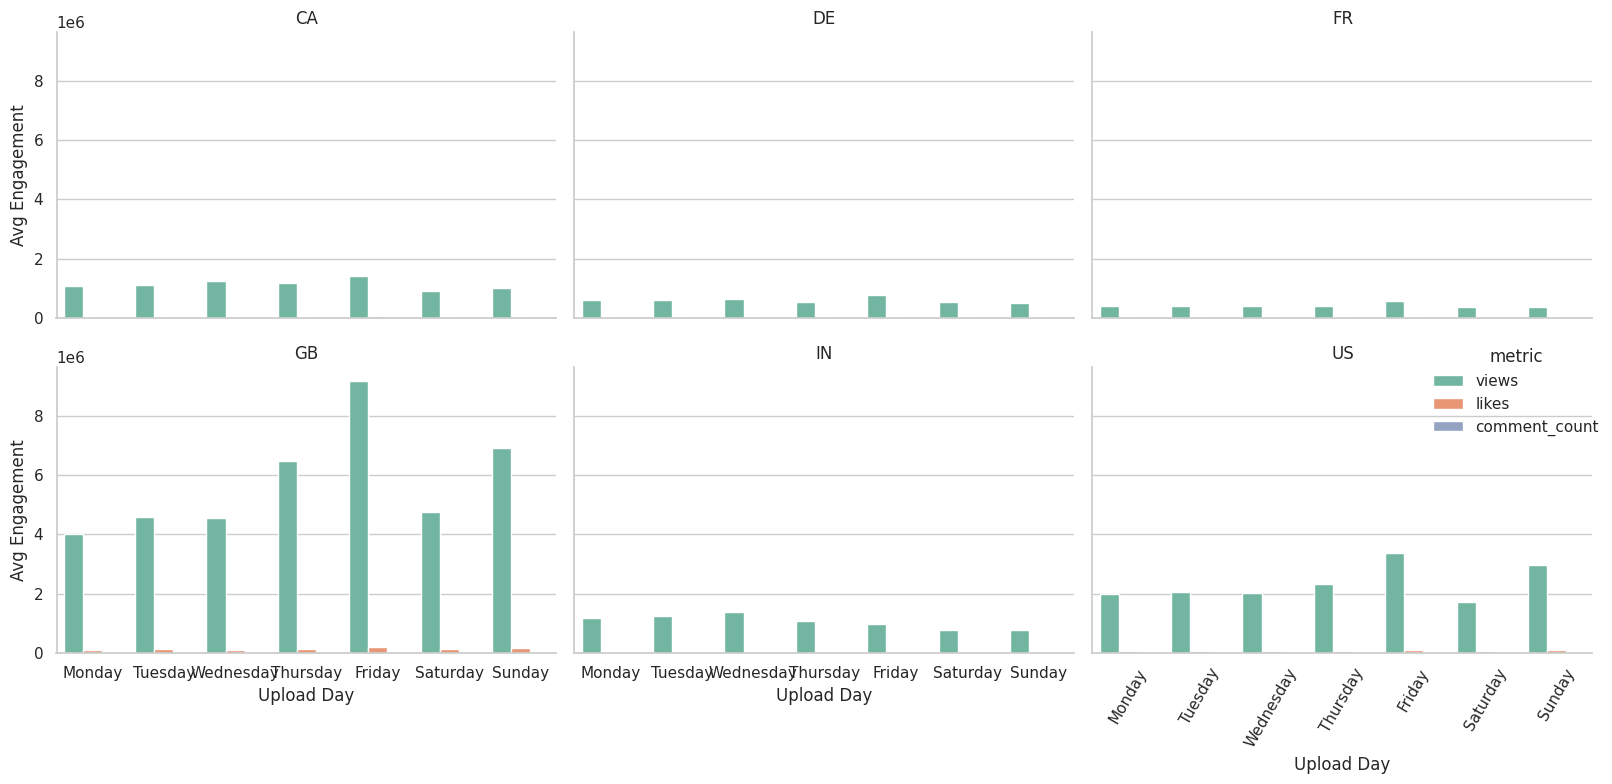

In [113]:
g = sns.catplot(
    data=day_country.melt(id_vars=['country', 'upload_day'], var_name='metric', value_name='value'),
    x='upload_day', y='value', hue='metric', col='country',
    kind='bar', col_wrap=3, height=4, aspect=1.2, palette='Set2'
)
g.set_titles('{col_name}')
g.set_axis_labels("Upload Day", "Avg Engagement")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

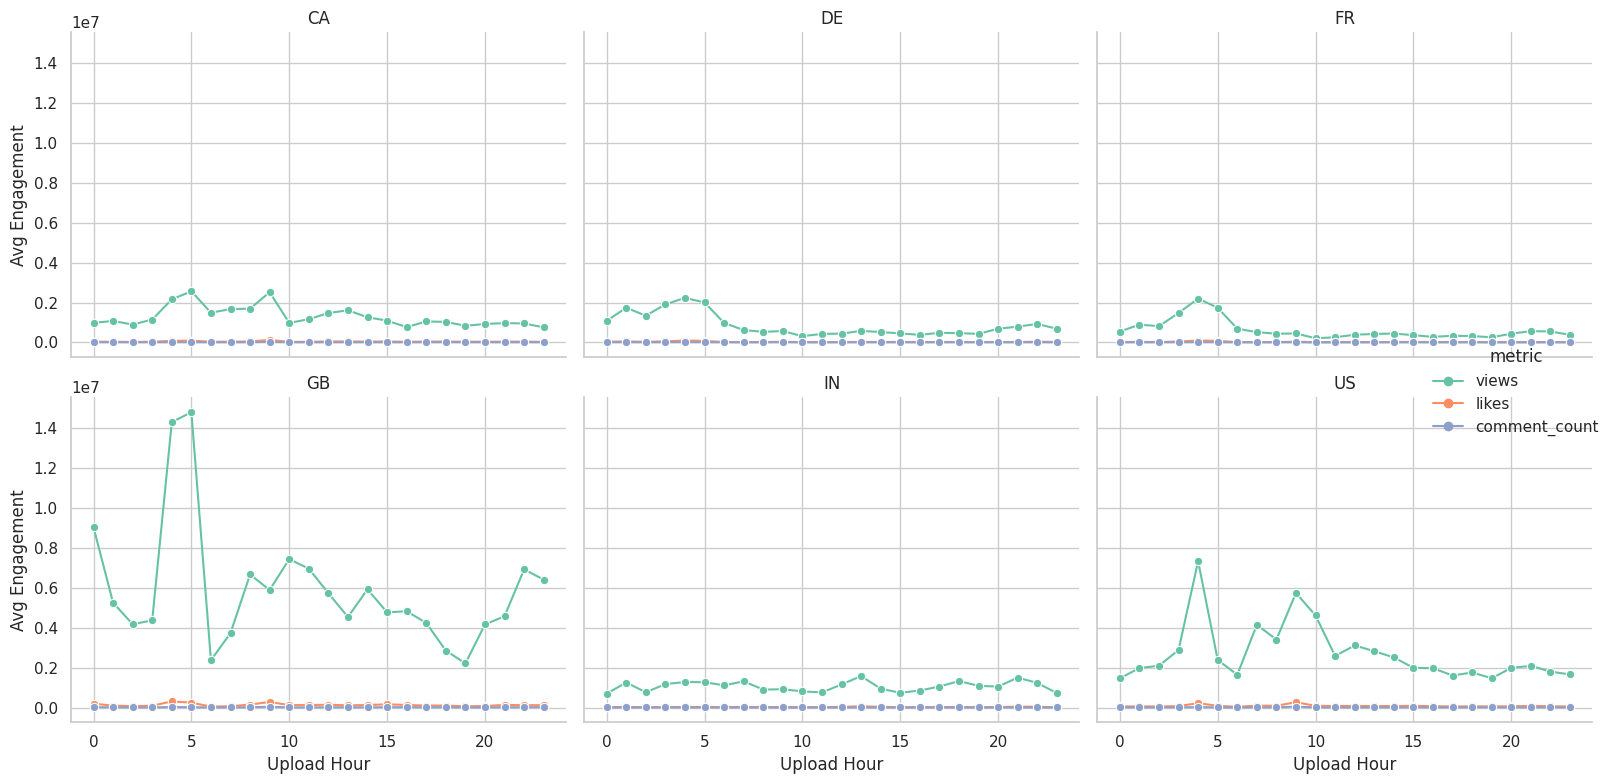

In [114]:
hour_country = df.groupby(['country', 'upload_hour'])[['views', 'likes', 'comment_count']].mean().reset_index()

g = sns.relplot(
    data=hour_country.melt(id_vars=['country', 'upload_hour'], var_name='metric', value_name='value'),
    x='upload_hour', y='value', hue='metric', col='country',
    kind='line', marker='o', col_wrap=3, height=4, aspect=1.2, palette='Set2'
)
g.set_titles('{col_name}')
g.set_axis_labels("Upload Hour", "Avg Engagement")
plt.tight_layout()
plt.show()


#### 7. Do short videos trend differently than long ones?

In [116]:
!pip install selenium
!apt-get update
!apt install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 21.4 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,140 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy

In [117]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=chrome_options)

In [118]:
def get_duration_from_youtube(video_id):
    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        driver.get(url)
        time.sleep(3)

        duration_meta = driver.find_element(By.XPATH, '//meta[@itemprop="duration"]')
        duration_iso = duration_meta.get_attribute('content')
        return duration_iso
    except Exception as e:
        print(f"Failed to fetch duration for {video_id}: {e}")
        return None


In [120]:
!pip install isodate

import isodate

def iso_to_seconds(iso_string):
    try:
        duration = isodate.parse_duration(iso_string)
        return duration.total_seconds()
    except:
        return None

In [121]:
sample_ids = df['video_id'].drop_duplicates().sample(50, random_state=42)

durations = {}
for vid in sample_ids:
    iso_duration = get_duration_from_youtube(vid)
    durations[vid] = iso_to_seconds(iso_duration)

df['duration_sec'] = df['video_id'].map(durations)
df['duration_min'] = df['duration_sec'] / 60

Failed to fetch duration for zngROjswfCw: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//meta[@itemprop="duration"]"}
  (Session info: chrome=135.0.7049.95); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x59f093705cea <unknown>
#1 0x59f0931b65f0 <unknown>
#2 0x59f093207a33 <unknown>
#3 0x59f093207c21 <unknown>
#4 0x59f093256274 <unknown>
#5 0x59f09322d68d <unknown>
#6 0x59f093253660 <unknown>
#7 0x59f09322d433 <unknown>
#8 0x59f0931f9ea3 <unknown>
#9 0x59f0931fab01 <unknown>
#10 0x59f0936cab3b <unknown>
#11 0x59f0936cea21 <unknown>
#12 0x59f0936b1c32 <unknown>
#13 0x59f0936cf594 <unknown>
#14 0x59f093695eef <unknown>
#15 0x59f0936f3d98 <unknown>
#16 0x59f0936f3f76 <unknown>
#17 0x59f093704b36 <unknown>
#18 0x7ef59dc2fac3 <unknown>

Failed to fetch duration for QkQC-7_RfpQ: Message: no such element: Unable to locate element: {"method":"x

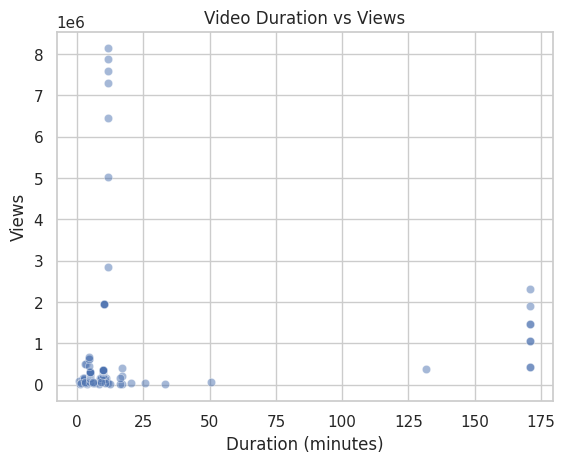

In [125]:
sns.scatterplot(data=df, x='duration_min', y='views', alpha=0.5)
plt.title('Video Duration vs Views')
plt.xlabel('Duration (minutes)')
plt.ylabel('Views')
plt.show()

# 2.2 Statistical Questions

#### 1. Is there a significant association between the day of the week a video is published and its likelihood of trending?

In [151]:
df['trended'] = True

In [152]:
contingency_table = pd.crosstab(df['upload_day'], df['trended'])

In [153]:
contingency_table

trended,True
upload_day,
Friday,41368
Monday,34207
Saturday,27228
Sunday,28423
Thursday,37753
Tuesday,34714
Wednesday,35969


In [154]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

Chi-Square Statistic: 0.0000
P-value: 1.0000


#### 2. Is there a significant difference in viewer engagement (likes-to-views ratio) across different video categories?

In [144]:
df['like_view_ratio'] = df['likes'] / df['views']
df = df[df['like_view_ratio'].notna() & (df['like_view_ratio'] < 1)]

In [145]:
from scipy.stats import kruskal

groups = df.groupby('category_name')['like_view_ratio'].apply(list)

In [147]:
stat, p = kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

Kruskal-Wallis H-statistic: 37118.6231
P-value: 0.0000


Since the p-value is less than 0.05, **there is a statistically significant difference in engagement ratios between at least two categories.**

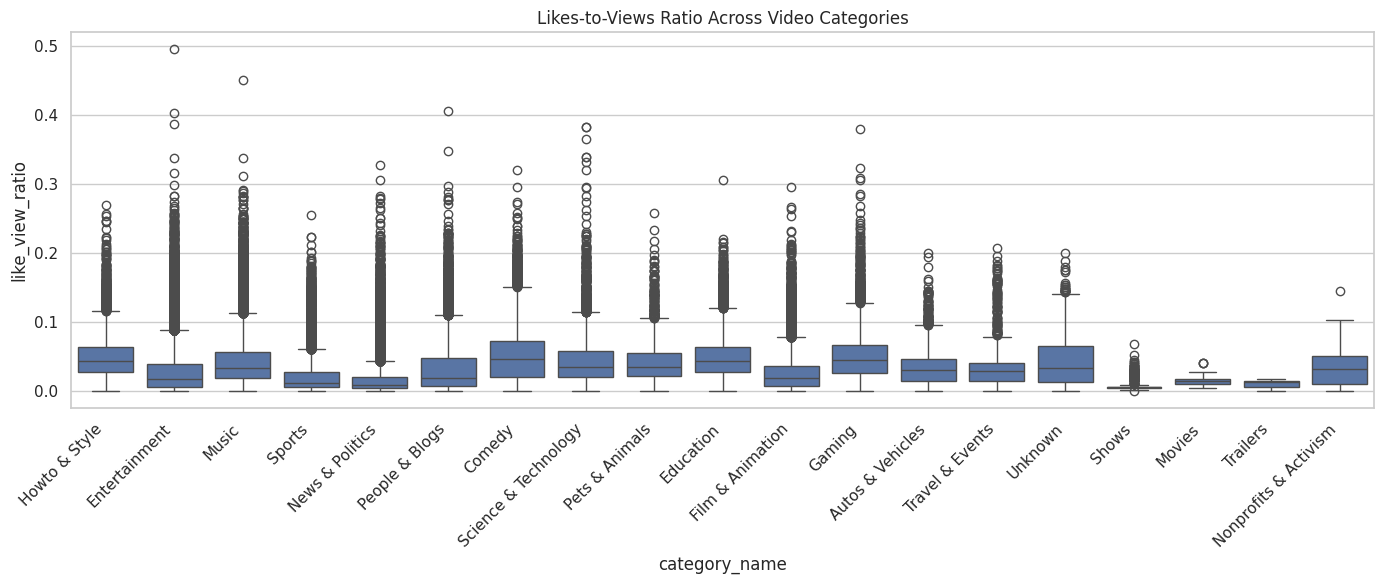

In [148]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category_name', y='like_view_ratio')
plt.xticks(rotation=45, ha='right')
plt.title('Likes-to-Views Ratio Across Video Categories')
plt.tight_layout()
plt.show()